# 1- Reunindo Dados

## 1.1-Dados em formato csv

In [21]:
import pandas as pd
import requests
import os
import tweepy
import json
from pathlib import Path
from pandas.io.json import json_normalize
df = pd.read_csv('twitter-archive-enhanced.csv')

## 1.2-Dados em formato tsv

In [22]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name = 'C:\\Users\\rodney\\Python'
response = requests.get(url)
with open(url.split('/')[-1],'wb') as file:
     file.write(response.content)

In [23]:
df1 = pd.read_csv(url.split('/')[-1],sep='\t')

## 1.3-Dados em formato json

In [24]:
# retweeted_status_id = NAN para pegar apenas id de tweets originais(descartar retweets)
dfx = df.loc[df['retweeted_status_id'].isnull()]
idx = pd.merge(dfx,df1,how='left',on= 'tweet_id')
idx = idx[1:]

In [5]:
#API keys- retirado

In [6]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)
# https://stackoverflow.com/questions/21308762/avoid-twitter-api-limitation-with-tweepy
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True,parser=tweepy.parsers.JSONParser())
a = 0
b = 0
df2 = []
for idv in idx['tweet_id']:
    try:
        tweet = api.get_status(idv,tweet_mode='extended')
        df2.append(tweet)
        a = a+1
        if a==20:
            b = a+b
            a = 0
            p = 100*b/len(idx)
            # https://stackoverflow.com/questions/4897359/output-to-the-same-line-overwriting-previous-output-python-2-5
            print("Progresso {0:.1f} %".format(p),end='\r')
    except tweepy.TweepError:
        continue
    except Exception as Exc:
        continue
print("Progresso 100  %")
print("\n")
print("Concluído !")
# https://stackoverflow.com/questions/35662026/unicodeencodeerror-charmap-codec-cant-encode-characters-triggered-by-csv-m


NameError: name 'CONSUMER_KEY' is not defined

In [6]:
# Acessar API e salvar arquivo
# https://stackoverflow.com/questions/44892875/writing-multiple-json-objects-to-a-json-file
with open("json_tweets.txt", "a") as myfile:
     for row in df2:
        print(json.dumps(row), file=myfile)
file.close()

NameError: name 'df2' is not defined

In [25]:
# Ler arquivo JSON
# https://stackoverflow.com/questions/45545200/loading-and-reading-a-json-file-with-multiple-json-objects-in-python-3-4 
# https://stackoverflow.com/questions/41168558/python-how-to-convert-json-file-to-dataframe
df3 = pd.DataFrame()
with open("tweet_json.txt") as json_data:
         for line in json_data:
                try:
                    d = json.loads(line)
                    df_aux = pd.DataFrame([d['id'],d['created_at'],d['full_text'],d['favorite_count'],d['retweet_count'],d['in_reply_to_status_id'],d['entities']['media'][0]['expanded_url'],d['entities']['media'][0]['media_url_https'],d['entities']['media'][0]['type']])
                    df_aux = df_aux.transpose()
                    df3 = df3.append(df_aux)
                except Exception as Exc:
                    continue
file.close()


In [26]:
df3.columns = ['id','timestamp','full_text','favorite_count','retweet_count','in_reply_to_status_id','expanded_url','media_url_https','media_type']
df3=df3.reset_index()
df3=df3.drop('index',axis=1)


# 2- Avaliando Dados

## 2.1-Avaliação Visual

In [18]:
df


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [101]:
# Salvar em csv para poder analisar no Excell também
df.to_csv('Df_visual.csv', sep=',')

In [93]:
df1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [102]:
# Salvar em csv para poder analisar no Excell também
df1.to_csv('Df1_visual.csv', sep=',')

In [94]:
df3

,id,timestamp,full_text,favorite_count,retweet_count,in_reply_to_status_id,expanded_url,media_url_https,media_type
0,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,33263,6319,None,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,photo
1,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,25062,4193,None,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,photo
2,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,42213,8713,None,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,photo
3,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,40359,9485,None,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,photo
4,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,Here we have a majestic great white breaching ...,20243,3136,None,https://twitter.com/dog_rates/status/891087950...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,photo
5,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,Meet Jax. He enjoys ice cream so much he gets ...,11865,2089,None,https://twitter.com/dog_rates/status/890971913...,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,photo
6,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,When you watch your owner call another dog a g...,65612,19059,None,https://twitter.com/dog_rates/status/890729181...,https://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg,photo
7,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,This is Zoey. She doesn't want to be one of th...,27790,4300,None,https://twitter.com/dog_rates/status/890609185...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,photo
8,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,This is Cassie. She is a college pup. Studying...,31978,7481,None,https://twitter.com/dog_rates/status/890240255...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,photo
9,890006608113172480,Wed Jul 26 00:31:25 +0000 2017,This is Koda. He is a South Australian decksha...,30679,7399,None,https://twitter.com/dog_rates/status/890006608...,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,photo


In [103]:
# Salvar em csv para poder analisar no Excell também
df3.to_csv('Df3_visual.csv', sep=',')

## 2.2-Avaliação Programática

In [47]:
df.info()
df['name'].value_counts()
df['rating_denominator'].value_counts()
df['expanded_urls'].value_counts()
df['expanded_urls'].describe()
df['tweet_id'].describe()
df['puppo'].value_counts()
df['rating_denominator']
df.loc[df['rating_denominator'] != 10]['text']
df['name'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

count                                                  2297
unique                                                 2218
top       https://twitter.com/dog_rates/status/666104133...
freq                                                      2
Name: expanded_urls, dtype: object

In [424]:
df['expanded_urls'].head()
b = df['expanded_urls'].str.extract('(.{0,8}$)')
b.value_counts()

C:\Users\rodney\Anaconda2\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


/photo/1    2077
/video/1      82
gaEOiLO3       2
pMFbejFz       2
Am5Lrgrh       2
xeUpuKEr       2
XZI1rqxX       2
jlxULzbn       2
Dg3XPX7a       2
HLBMMdlV       2
OwvPTx9l       2
baj1VpIz       2
q6hmrEI3       2
nzrauFuV       2
d3LZqXxd       2
xTbj1UAM       1
jdlEjwMl       1
83467265       1
xxYaQ60K       1
EU2lVqxz       1
04595201       1
MphL5DBY       1
2OEwu9vg       1
63245829       1
lDnuOD0l       1
80628224       1
KZEU2nHq       1
riMBmX6W       1
ZvHgI17r       1
youtu.be       1
            ... 
38099712       1
ZmtE1FTB       1
00719360       1
24273152       1
0Ugzi2PO       1
YwqmuDeT       1
OvVqq0A6       1
KejYdLlh       1
18024452       1
0WqHwiFp       1
Wzrenw5h       1
QaPFbgOY       1
DaFthX6O       1
mMHxtqDD       1
37512960       1
nTOEuuOI       1
78521856       1
BOTl5p9z       1
wAzEatd6       1
BWerY9X2       1
hLu9LU5i       1
HKYrdb1d       1
3wmqXYmA       1
iLXiiHvX       1
44579584       1
42531073       1
u2B0kw2_       1
IxntjtO7      

In [8]:
df1.info()
df1['jpg_url'].describe()
df1.loc[df1['img_num'] >1]['jpg_url']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


144     https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg
312     https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg
315     https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg
319     https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg
345     https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg
381     https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg
382     https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg
410     https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg
441     https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg
452     https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg
454     https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg
478     https://pbs.twimg.com/media/CV9EvZNUwAAgLCK.jpg
479     https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg
494     https://pbs.twimg.com/media/CWCbd8ZWoAAtqoH.jpg
511     https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg
517     https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg
530     https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg
531     https://pbs.twimg.com/media/CWSN-vaXAAA8

A confiança do algoritmo1 é bem maior que a dos outros,como mostrado:

In [213]:
a1 = df1.loc[(df1['p1_dog'] == True)]
a2 = df1.loc[(df1['p2_dog'] == True)]
a3 = df1.loc[(df1['p3_dog'] == True)]
a1['p1_conf'].describe()

count    1532.000000
mean        0.613823
std         0.259735
min         0.044333
25%         0.390981
50%         0.614025
75%         0.850559
max         0.999956
Name: p1_conf, dtype: float64

In [214]:
a2['p2_conf'].describe()

count    1553.000000
mean        0.140470
std         0.103521
min         0.000010
25%         0.054455
50%         0.125912
75%         0.202907
max         0.467678
Name: p2_conf, dtype: float64

In [215]:
a3['p3_conf'].describe()

count    1499.000000
mean        0.061642
std         0.052206
min         0.000001
25%         0.016538
50%         0.049218
75%         0.094875
max         0.273419
Name: p3_conf, dtype: float64

**Qualidade**

In [9]:
df3.info()
df3['media_url_https'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 9 columns):
id                       1993 non-null object
timestamp                1993 non-null object
full_text                1993 non-null object
favorite_count           1993 non-null object
retweet_count            1993 non-null object
in_reply_to_status_id    23 non-null object
expanded_url             1993 non-null object
media_url_https          1993 non-null object
media_type               1993 non-null object
dtypes: object(9)
memory usage: 140.2+ KB


count                                                1993
unique                                               1993
top       https://pbs.twimg.com/media/CkiLHCjUUAAPwUr.jpg
freq                                                    1
Name: media_url_https, dtype: object

1- No conjunto 'df' o tipo na coluna 'timestamp' está como 'object' e o tipo tweet_id está como float.As colunas 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id' estão como float e não string.
No conjunto df1 a coluna tweet_id está como int.

2-No conjunto de dados 'df' , para alguns cachorros ou o nome está como 'the','a' ou 'an' 

3-No conjunto df3 as colunas 'id'e 'in_reply_to_status_id' estão como 'int'. 

4-No conjunto de dados 'df' , nas colunas retweeted_status_id,retweeted_status_user_id e retweeted_status_timestamp existem 181 valores não nulos.Isto quer dizer que são retweets, só devemos buscar tweets originais. 

5-No conjunto 'df',algumas notas possuem números decimais na coluna 'texto' mas esses números não estão representados corretamente na coluna rating_numerator

6-No conjunto de dados 'df1', as colunas 'p1','p2' e 'p3' tem nomes de raça em maiúsculo e minúsculo.

7- No conjunto 'df' existem tweets que não tem fotos,devem ser descartados pois foram pedidos apenas aqueles com fotos

8- No conjunto 'df1' existem tweets que não tem fotos de cachorros

**Arrumação**

1-No conjunto 'df' as colunas doggo,floofer,pupper e puppo não representam uma variável e cada linha destas colunas não é uma observação.  

2-A coluna 'jpg_url' no conjunto 'df1' está duplicada, esta informação já está no conjunto 'df'

3-No conjunto 'df3' as colunas 'timestamp','full_text','in_reply_to_status_id','expanded_url' e 'media_url_https' estão duplicadas, pois já existe esta informação no conjunto 'df'


# 3- Limpando Dados

Cópia de dados

In [27]:
df_clean = df.copy()
df1_clean = df1.copy()
df3_clean = df3.copy()

# 3.1 Arrumação

1-No conjunto 'df' as colunas doggo,floofer,pupper e puppo não representam uma variável e cada linha destas colunas não é uma observação.

**Definição**


No conjunto 'df',transformar as colunas doggo,floofer,pupper e puppo em uma coluna com a definição do cachorro.

**Código**

In [28]:
df_clean['dog_nick'] = ''
df_clean.loc[df_clean['doggo'] == 'doggo',['dog_nick']]= 'doggo'
df_clean.loc[df_clean['pupper'] == 'pupper',['dog_nick']]= 'pupper'+' '+df_clean['dog_nick']
df_clean.loc[df_clean['puppo'] == 'puppo',['dog_nick']]= 'puppo'+' '+df_clean['dog_nick']
df_clean.loc[df_clean['floofer'] == 'floofer',['dog_nick']]= 'floofer'+' '+df_clean['dog_nick']
df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

**Teste**

In [13]:
df['pupper'].value_counts()   #257
df['doggo'].value_counts()    #97
df['puppo'].value_counts()    #30
df['floofer'].value_counts()  #10
df_clean['dog_nick'].value_counts()
#obs: 14 cachorros tem duas classificações


                 1976
pupper            245
doggo              83
puppo              29
pupper doggo       12
floofer             9
puppo doggo         1
floofer doggo       1
Name: dog_nick, dtype: int64

2-A coluna 'jpg_url' no conjunto 'df1' está duplicada, esta informação já está no conjunto 'df'

**Definição**


Apagar do 'df1' a coluna  'jpg_url'

**Código**

In [29]:
df1_clean.drop(['jpg_url'],axis=1,inplace=True)

**Teste**

In [145]:
df1_clean.head(2)

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3-No conjunto 'df3' as colunas 'timestamp','full_text','in_reply_to_status_id','expanded_url' e 'media_url_https' estão duplicadas, pois já existe esta informação no conjunto 'df'


**Definição**


Deletar as colunas 'timestamp','full_text','in_reply_to_status_id','expanded_url' e 'media_url_https' do df3

**Código**

In [30]:
df3_clean.drop(['timestamp','full_text','in_reply_to_status_id','expanded_url','media_url_https'],axis=1,inplace=True)

**Teste**

In [369]:
df3_clean.info()

,id,full_text,favorite_count,retweet_count,expanded_url,media_url_https,media_type
0,892177421306343426,This is Tilly. She's just checking pup on you....,33263,6319,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,photo
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,25062,4193,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,photo
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,42213,8713,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,photo
3,891327558926688256,This is Franklin. He would like you to stop ca...,40359,9485,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,photo


# 3.2 Qualidade

1- No conjunto 'df' o tipo na coluna 'timestamp' está como 'object' e o tipo tweet_id está como float.As colunas 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id' e 'retweeted_status_user_id' estão como float 
e não string.No conjunto df1 a coluna tweet_id está como int

**Definição**


Alterar no 'df' o tipo na coluna 'timestamp' de 'object' para 'timestamp' e o tipo tweet_id de float para string.
Alterar as colunas 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id' e 'retweeted_status_user_id' para string.
No conjunto 'df1' alterar coluna 'tweet_id' para 'string'.

**Código**

In [31]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].astype(str)
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].astype(str)
df_clean['retweeted_status_id'] = df_clean['retweeted_status_id'].astype(str)
df_clean['retweeted_status_user_id'] = df_clean['retweeted_status_user_id'].astype(str)
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)

**Teste**

In [52]:
df_clean.info()
type(df_clean['tweet_id'][1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_nick                      2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 257.8+ KB


str

In [29]:
df1_clean.info()
type(df1_clean['tweet_id'][1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


str

2-No conjunto de dados 'df' , para alguns cachorros ou o nome está como 'the','a' ou 'an'

**Definição**


No conjunto 'df', arrumar os nomes de cães. Valores nulos representados pela string 'None' devem ser substituídos pelo
valor vazio(None).

**Código**

In [32]:
a= ""
a = df_clean['name'].str.extract('(^[A-Z].{0,15})')
a = a.replace('None',None)
df_clean['name'] = a

C:\Users\rodney\Anaconda2\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


**Teste**

In [44]:
df_clean['name'].value_counts()


Cooper       19
Penny        18
Lucy         17
Charlie      17
Sadie        16
Lola         16
Daisy        15
Oliver       14
Toby         13
Scout        13
Bo           11
Winston      11
Oscar        10
Tucker       10
Koda         10
Jack         10
Sunny         9
Dave          9
Duke          9
Reggie        9
Leo           9
Olive         8
Clark         8
Bailey        8
Oakley        8
Milo          8
Sandy         8
Otis          8
Jax           8
Grizzie       8
             ..
Mojo          1
Kulet         1
Swagger       1
Siba          1
Tessa         1
Amélie        1
Kallie        1
Brat          1
Bradlay       1
Nimbus        1
Biden         1
Humphrey      1
Tiger         1
Ralf          1
Adele         1
Moofasa       1
Maks          1
Suki          1
Billl         1
Aubie         1
Monty         1
Gòrdón        1
William       1
Sojourner     1
Coopson       1
Lance         1
Alejandro     1
Eazy          1
Beemo         1
Milky         1
Name: name, Length: 931,

3-No conjunto df3 a coluna 'id'está como 'int'.

**Definição**


No conjunto 'df3' colocar a coluna 'id' como 'string'.

**Código**

In [33]:
df3_clean.head(2)

,id,favorite_count,retweet_count,media_type
0,892177421306343426,33263,6319,photo
1,891815181378084864,25062,4193,photo


In [34]:
df3_clean['id'] = df3_clean['id'].astype(str)

**Teste**

In [55]:
df3_clean.info()
type(df3_clean['id'][1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 4 columns):
id                1993 non-null object
favorite_count    1993 non-null object
retweet_count     1993 non-null object
media_type        1993 non-null object
dtypes: object(4)
memory usage: 62.4+ KB


str

4-No conjunto de dados 'df' , nas colunas retweeted_status_id,retweeted_status_user_id e retweeted_status_timestamp existem 181 valores não nulos.Isto quer dizer que são retweets, só devemos buscar tweets originais. 

**Definição**


Filtrar no conjunto 'df' nas colunas retweeted_status_id,retweeted_status_user_id 
e retweeted_status_timestamp os valores nulos

**Código**

In [35]:
df_clean = df_clean.loc[(df_clean['retweeted_status_id'] == 'nan') | (df_clean['retweeted_status_user_id'].str == 'nan') | (df_clean['retweeted_status_timestamp'].isna()),:]


**Teste**

In [108]:
df_clean['retweeted_status_id'].value_counts()

nan    2175
Name: retweeted_status_id, dtype: int64

In [109]:
df_clean['retweeted_status_user_id'].value_counts()

nan    2175
Name: retweeted_status_user_id, dtype: int64

In [110]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_nick                      2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 254.9+ KB


5-No conjunto 'df',algumas notas possuem números decimais na coluna 'texto' mas esses números não estão representados corretamente na coluna rating_numerator

**Definição**


No conjunto 'df', colocar as notas dadas em números decimais do texto na coluna 'rating_numerator'.

**Código**

In [62]:
# altera a configuracao do notebook para exibir o texto completo
pd.set_option('display.max_colwidth', -1)
# filtra os tweets que possuem algum numero decimal no texto
#df_clean['rating_numerator'] = df_clean[df_clean.text.str.extract(r"(\d\.\d)", expand = False).notnull()]
a = df_clean.text.str.extract(r"(\d\.\d)", expand = False)
df_clean.loc[df_clean.text.str.extract(r"(\d\.\d)", expand = False).notnull(),'rating_numerator'] = a

**Teste**

In [63]:
df_clean['rating_numerator'].value_counts()

12      499
10      442
11      425
13      305
9       154
8       98 
7       54 
14      43 
5       34 
6       32 
3       19 
4       17 
2       9  
1       8  
1.2     2  
0       2  
2.4     2  
420     2  
15      1  
17      1  
20      1  
24      1  
44      1  
45      1  
84      1  
9.7     1  
144     1  
8.9     1  
9.5     1  
204     1  
960     1  
182     1  
2.0     1  
165     1  
666     1  
143     1  
60      1  
5.7     1  
121     1  
99      1  
88      1  
3.5     1  
80      1  
1776    1  
4.3     1  
50      1  
Name: rating_numerator, dtype: int64

6-No conjunto de dados 'df1', as colunas 'p1','p2' e 'p3' tem nomes de raça em maiúsculo e minúsculo.

**Definição**


Colocar os nomes de raças em minúsculo no df1

**Código**

In [64]:
df1_clean['p1'] =df1_clean['p1'].str.lower()
df1_clean['p2'] =df1_clean['p2'].str.lower()
df1_clean['p3'] =df1_clean['p3'].str.lower()

**Teste**

In [117]:
df1_clean

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


7- No conjunto 'df' existem tweets que não tem fotos,devem ser descartados pois foram pedidos apenas aqueles com fotos

**Definição**


Filtrar no conjunto 'df' os tweets que contém fotos

**Código**

In [65]:
df_clean = df_clean.loc[df_clean['expanded_urls'].str.extract('(.{0,7}$)') == 'photo/1']

C:\Users\rodney\Anaconda2\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


**Teste**

In [22]:
b = df_clean['expanded_urls'].str.extract('(.{0,7}$)')
b.value_counts()

C:\Users\rodney\Anaconda2\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


photo/1    1920
Name: expanded_urls, dtype: int64

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      1920 non-null object
in_reply_to_status_id         1920 non-null object
in_reply_to_user_id           1920 non-null object
timestamp                     1920 non-null datetime64[ns]
source                        1920 non-null object
text                          1920 non-null object
retweeted_status_id           1920 non-null object
retweeted_status_user_id      1920 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1920 non-null object
rating_numerator              1905 non-null float64
rating_denominator            1905 non-null float64
name                          1920 non-null object
dog_nick                      1920 non-null object
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 225.0+ KB


8- No conjunto 'df1' existem tweets que não têm fotos de cachorros

**Definição**


Filtrar no conjunto 'df1' os tweets que contém fotos de cachorros para o algoritmo1
(coluna p1_dog = True ) Obs: Como mostrado no item Avaliação Programática, o algoritmo1
tem maior confiança que os outros.

**Código**

In [66]:
df1_clean = df1_clean.loc[(df1_clean['p1_dog'] == True)]

In [67]:
df1_clean['p1_conf'].describe()

count    1532.000000
mean     0.613823   
std      0.259735   
min      0.044333   
25%      0.390981   
50%      0.614025   
75%      0.850559   
max      0.999956   
Name: p1_conf, dtype: float64

**Teste**

In [26]:
df1_clean['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

# 3- Juntando tudo em um CSV

In [68]:
df3_clean = df3_clean.rename(index=str,columns={"id":"tweet_id"})
df_master = pd.merge(df_clean,df3_clean,how='left',on='tweet_id')

In [69]:
df_master = pd.merge(df_master,df1_clean[['tweet_id','p1','p1_conf']],how='left',on='tweet_id')

In [70]:
df_master = df_master.rename(index=str,columns={"p1":"dog_breed","p1_conf":"dog_breed_conf"})
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 0 to 1919
Data columns (total 19 columns):
tweet_id                      1920 non-null object
in_reply_to_status_id         1920 non-null object
in_reply_to_user_id           1920 non-null object
timestamp                     1920 non-null datetime64[ns]
source                        1920 non-null object
text                          1920 non-null object
retweeted_status_id           1920 non-null object
retweeted_status_user_id      1920 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 1920 non-null object
rating_numerator              1920 non-null object
rating_denominator            1920 non-null int64
name                          1787 non-null object
dog_nick                      1920 non-null object
favorite_count                1919 non-null object
retweet_count                 1919 non-null object
media_type                    1919 non-null object
dog_breed                  

In [71]:
df_master.to_csv('twitter_archive_master.csv', sep=',',index=False)

# 4- Visualização de Dados

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np

In [268]:
dff = pd.read_csv('twitter_archive_master.csv',sep=',')
dff = dff.sort_values(by='timestamp')
dff['timestamp'] =  pd.to_datetime(dff['timestamp'], format='%Y-%m-%d %H:%M:%S')
Yfav = dff.groupby(pd.Grouper(key='timestamp', freq='Y')).sum()['favorite_count']
Yret = dff.groupby(pd.Grouper(key='timestamp', freq='Y')).sum()['retweet_count']
Yfav.index = Yfav.index.strftime('%Y')
Yret.index = Yret.index.strftime('%Y')

Text(0.5,1,'Número Total de "Likes" por Ano')

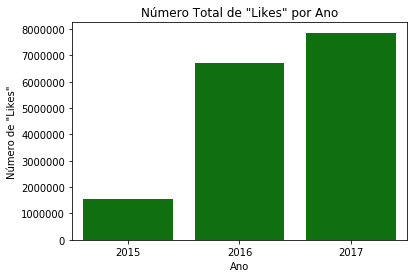

In [269]:
sns.barplot(Yfav.index,Yfav,color='green')
plt.ylabel('Número de "Likes"');
plt.xlabel('Ano');
plt.title('Número Total de "Likes" por Ano')

Text(0.5,1,'Número Total de Retweets por Ano')

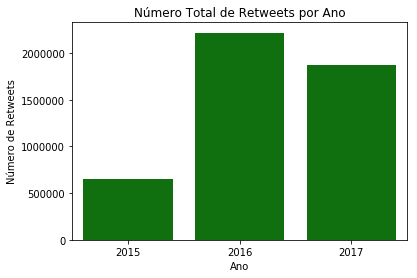

In [270]:
sns.barplot(Yret.index,Yret,color='green')
plt.ylabel('Número de Retweets');
plt.xlabel('Ano');
plt.title('Número Total de Retweets por Ano')

Text(0.5,1,'Correlação entre Número de "Likes" e Retweets para cada Tweet')

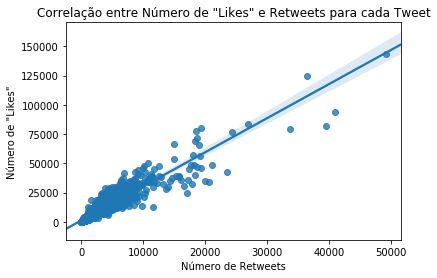

In [271]:
sns.regplot(x=dff['retweet_count'], y=dff['favorite_count'])
plt.ylabel('Número de "Likes"');
plt.xlabel('Número de Retweets');
plt.title('Correlação entre Número de "Likes" e Retweets para cada Tweet')

In [277]:
dog_b = dff.groupby('dog_breed').nunique()['tweet_id']
Sum = dog_b.sort_values(ascending=False).sum()
Y = 100*dog_b.sort_values(ascending=False)/Sum
Y = Y.head(10)

In [279]:
Y

dog_breed
golden_retriever      9.517145
labrador_retriever    6.298111
pembroke              6.088174
chihuahua             5.318404
pug                   3.778866
chow                  2.869139
toy_poodle            2.659202
samoyed               2.589223
pomeranian            2.589223
malamute              2.029391
Name: tweet_id, dtype: float64

Text(0.5,1,'As 10 Raças com Maior Número Percentual de Tweets')

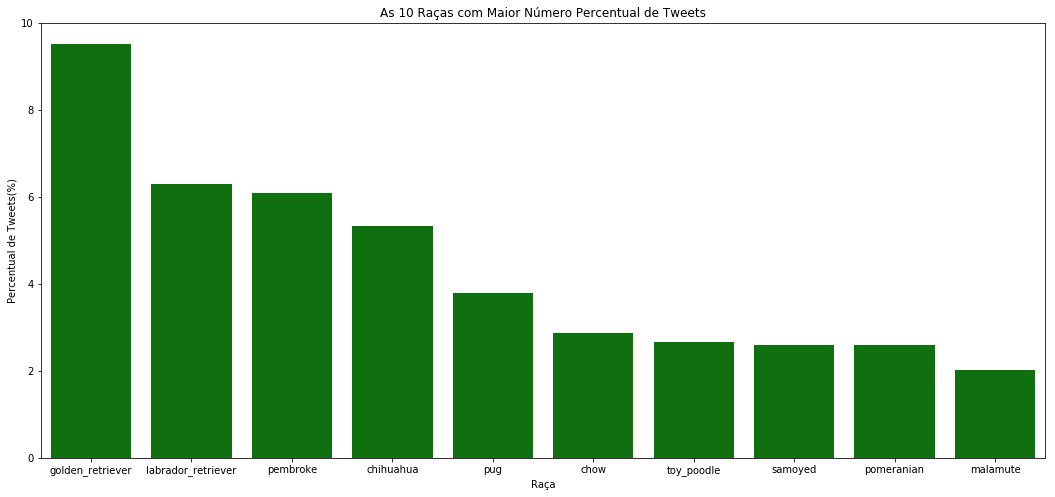

In [278]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.barplot(Y.index,Y,color='green')
plt.ylabel('Percentual de Tweets(%)');
plt.xlabel('Raça');
plt.title('As 10 Raças com Maior Número Percentual de Tweets')

dog_breed
sussex_spaniel             0.139958
toy_terrier                0.139958
clumber                    0.069979
entlebucher                0.069979
groenendael                0.069979
wire-haired_fox_terrier    0.069979
scotch_terrier             0.069979
silky_terrier              0.069979
standard_schnauzer         0.069979
japanese_spaniel           0.069979
Name: tweet_id, dtype: float64

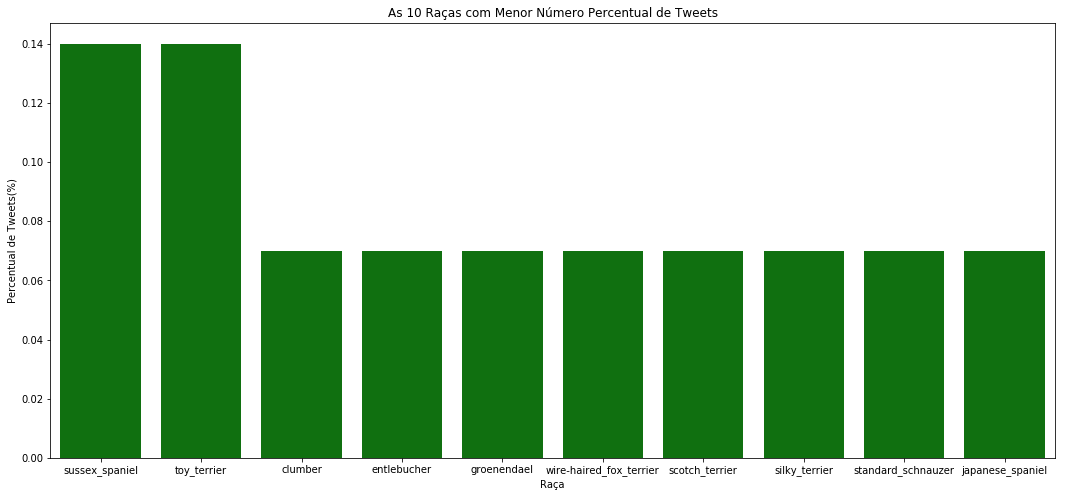

In [281]:
dog_b = dff.groupby('dog_breed').nunique()['tweet_id']
Sum = dog_b.sort_values(ascending=False).sum()
Y = 100*dog_b.sort_values(ascending=False)/Sum
Y = Y.tail(10)
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.barplot(Y.index,Y,color='green')
plt.ylabel('Percentual de Tweets(%)');
plt.xlabel('Raça');
plt.title('As 10 Raças com Menor Número Percentual de Tweets')
Y

dog_breed
golden_retriever      12.886294
pembroke               7.796914
labrador_retriever     7.380935
chihuahua              4.391085
french_bulldog         3.785326
samoyed                3.723476
chow                   3.233091
pug                    2.489385
pomeranian             2.283158
cardigan               2.023876
Name: favorite_count, dtype: float64

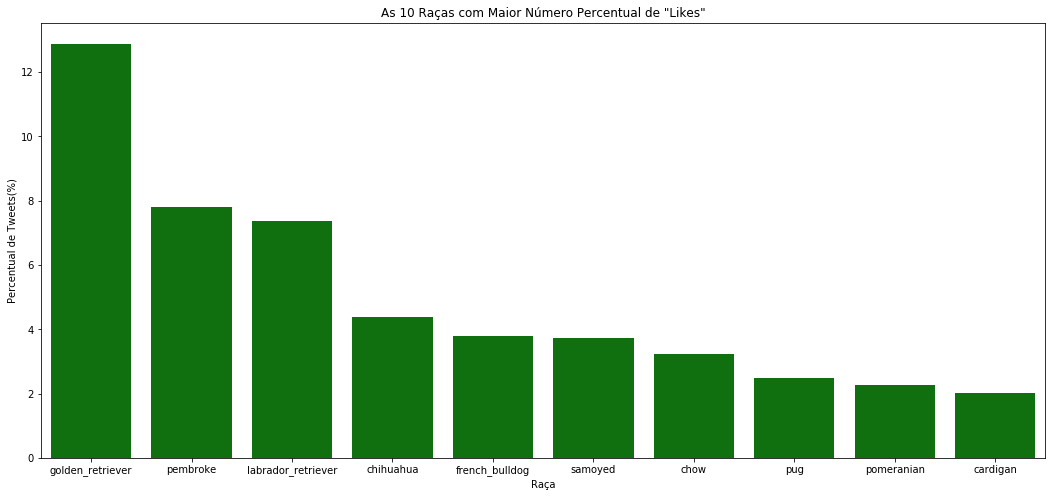

In [282]:
dog_b = dff.groupby('dog_breed').sum()['favorite_count']
Sum = dog_b.sort_values(ascending=False).sum()
Y = 100*dog_b.sort_values(ascending=False)/Sum
Y = Y.head(10)
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.barplot(Y.index,Y,color='green')
plt.ylabel('Percentual de Tweets(%)');
plt.xlabel('Raça');
plt.title('As 10 Raças com Maior Número Percentual de "Likes"')
Y

dog_breed
clumber                   0.056770
tibetan_terrier           0.038291
scotch_terrier            0.027980
ibizan_hound              0.025916
entlebucher               0.020884
brabancon_griffon         0.020622
standard_schnauzer        0.015851
curly-coated_retriever    0.015010
groenendael               0.014693
japanese_spaniel          0.010486
Name: favorite_count, dtype: float64

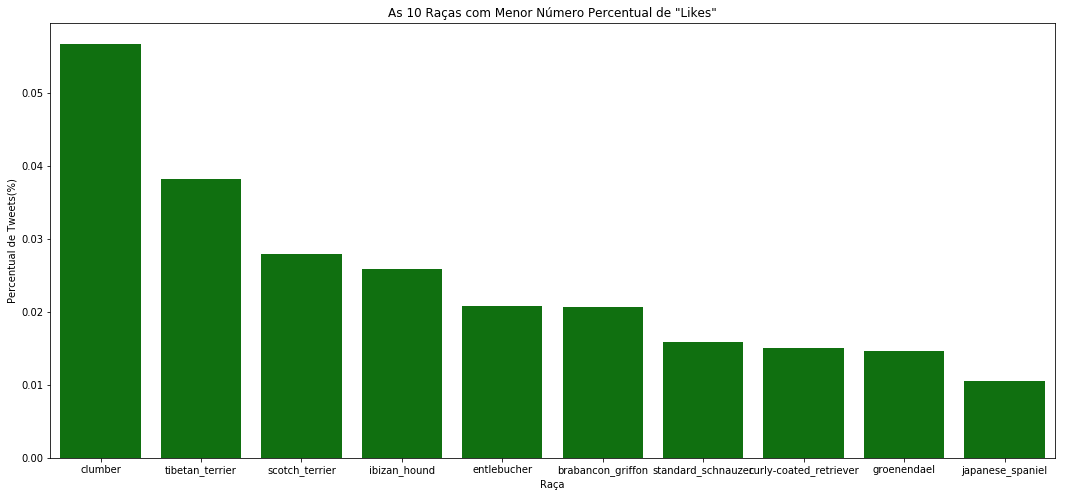

In [284]:
dog_b = dff.groupby('dog_breed').sum()['favorite_count']
Sum = dog_b.sort_values(ascending=False).sum()
Y = 100*dog_b.sort_values(ascending=False)/Sum
Y = Y.tail(10)
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.barplot(Y.index,Y,color='green')
plt.ylabel('Percentual de Tweets(%)');
plt.xlabel('Raça');
plt.title('As 10 Raças com Menor Número Percentual de "Likes"')
Y

dog_breed
golden_retriever      1.066480
pembroke              0.694892
labrador_retriever    0.682295
chihuahua             0.566830
pug                   0.386984
pomeranian            0.333800
chow                  0.333100
samoyed               0.300910
toy_poodle            0.295311
malamute              0.221134
Name: rating_numerator, dtype: float64

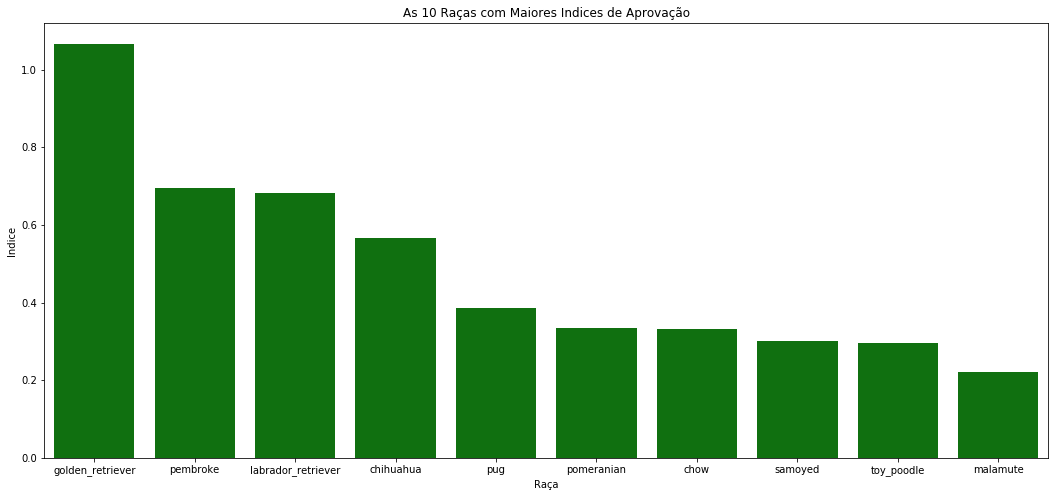

In [283]:
dog_b = dff.groupby('dog_breed').sum()['rating_numerator']/dff['dog_breed'].count()
Y = dog_b.sort_values(ascending=False)
Y = Y.head(10)
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
sns.barplot(Y.index,Y,color='green')
plt.ylabel('Indice');
plt.xlabel('Raça');
plt.title('As 10 Raças com Maiores Indices de Aprovação')
Y

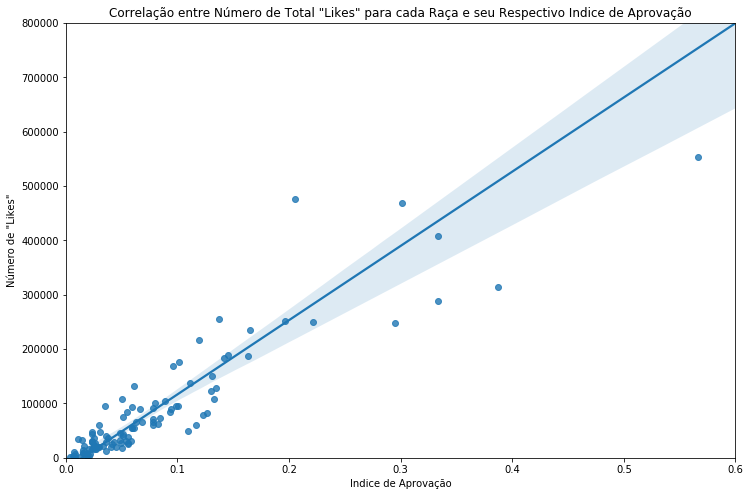

In [295]:
dog_b = dff.groupby('dog_breed').sum()['rating_numerator']/dff['dog_breed'].count()
dog_b2 = dff.groupby('dog_breed').sum()['favorite_count']
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.xlim(0, 0.6)
plt.ylim(0, 800000)
sns.regplot(x=dog_b, y=dog_b2)
plt.ylabel('Número de "Likes"');
plt.xlabel('Indice de Aprovação');
plt.title('Correlação entre Número de Total "Likes" para cada Raça e seu Respectivo Indice de Aprovação');